# Kalman Filter Seminar
Imagine that we want to estimate the translational velocity, $x_t$ , of a car by using the gas pedal, which provides information regarding the acceleration, $u_t$ , plus some noise, $\epsilon_t$ . The propagation model is $x_t = x_{t−1} +\Delta t·(u_t +\epsilon_t )$, where $\epsilon_t \sim \mathcal{N}(0,M)$, and covariance $M = 10$.

All relevant data for this task is contained in the *t4* file.
You may want to use numpy \texttt{load} function.
Some parameters are included there too, such as $\Delta t = 0.1$, $x_0=0$, $\Sigma_0 = 0$ (vehicle stopped).

## 1) Open loop estimation
Unfortunately for us, there is a difference between the controls that we have commanded and the controls that the car has actually executed. This uncertainty is expressed in the form of corrupted controls by the r.v. $\epsilon_t$. Calculate the state trajectory of $x_t$ just by considering the noisy controls  $u_t+\epsilon_t$ provided. Write the equations and plot the results, that is, $\bar{\mu}_t$ and $\pm$1-sigma. Compare it to the real state $x_t$ of the velocity. Comment on the results.

*Hint:* this a covariance projection problem. The noise should be projected too.

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
%matplotlib inline
from ciplot import ciplot
data = np.load('data')
print(data.files)

['t', 'dt', 'N', 'M', 'Q', 'u', 'z', 'x_real', 'x_0', 'P_0']


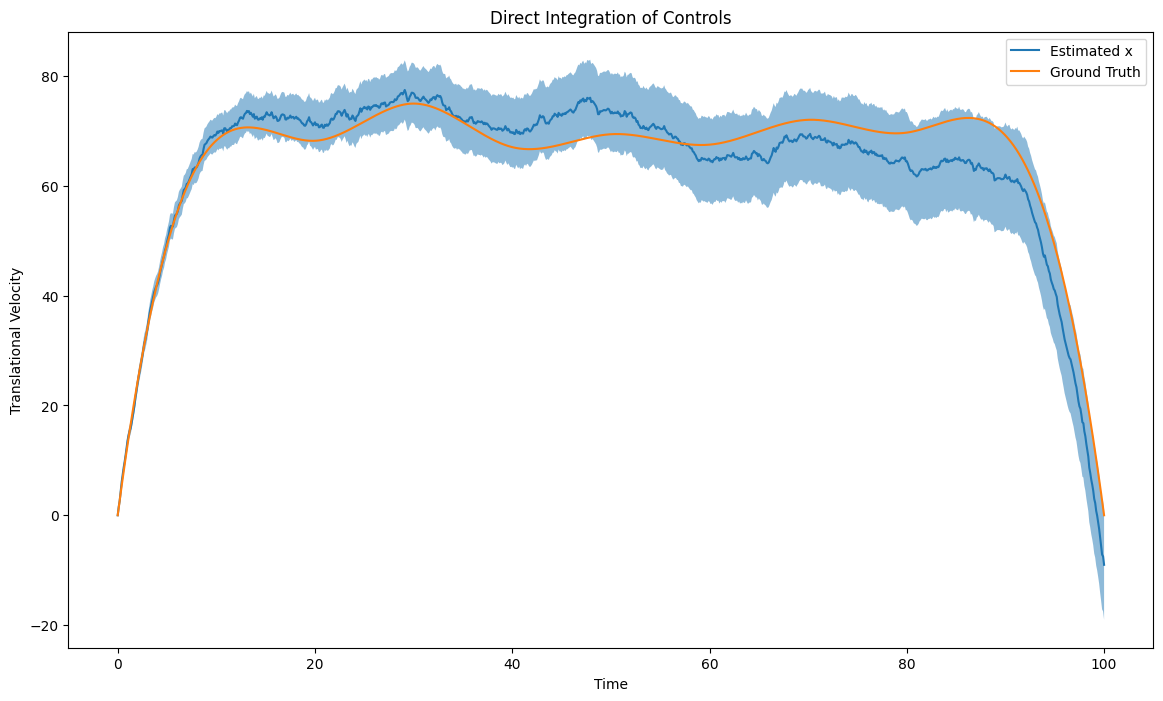

In [2]:
# Loading variables
N = data['N']
dt = data['dt']
M = data['M']
t = data['t']
u = data['u'] #first action u[0] corresponds to the first propagation x[1] = x[0] + u[0]dt
x_real = data['x_real']
x_pred = np.zeros(N)
P_pred = np.zeros(N)
x_pred[0] = data['x_0']
P_pred[0] = data['P_0']

# TODO calculate the open loop prediction and covariance
for i in range(1,N):
    x_pred[i] = x_pred[i-1] + dt * u[i-1]
    P_pred[i] = P_pred[i-1] + dt ** 2 * M


#sigma = np.zeros(N)
sigma = np.sqrt(P_pred)

minus_sigma = x_pred - sigma
plus_sigma = x_pred + sigma
plt.figure(figsize=(14,8))
handles = ciplot(t, x_pred, minus_sigma, plus_sigma, x_real)


plt.title('Direct Integration of Controls')
plt.legend(handles, ['Estimated x', 'Ground Truth'])
plt.xlabel('Time')
plt.ylabel('Translational Velocity')
plt.show()

## 2) Adding observations
In order to circumvent the drifting issue, we need to observe our state $x_t$. Our observations are the integration over a time step of an accelerometer *perfectly* aligned with the car's translation direction. The observation model $z_t = x_t + \delta_t$, where $\delta_t \sim \mathcal{N}(0,Q)$, being $Q = 5$. Plot the raw observations and compare them with the real state $x_t$.

In [10]:
Q

NameError: name 'Q' is not defined

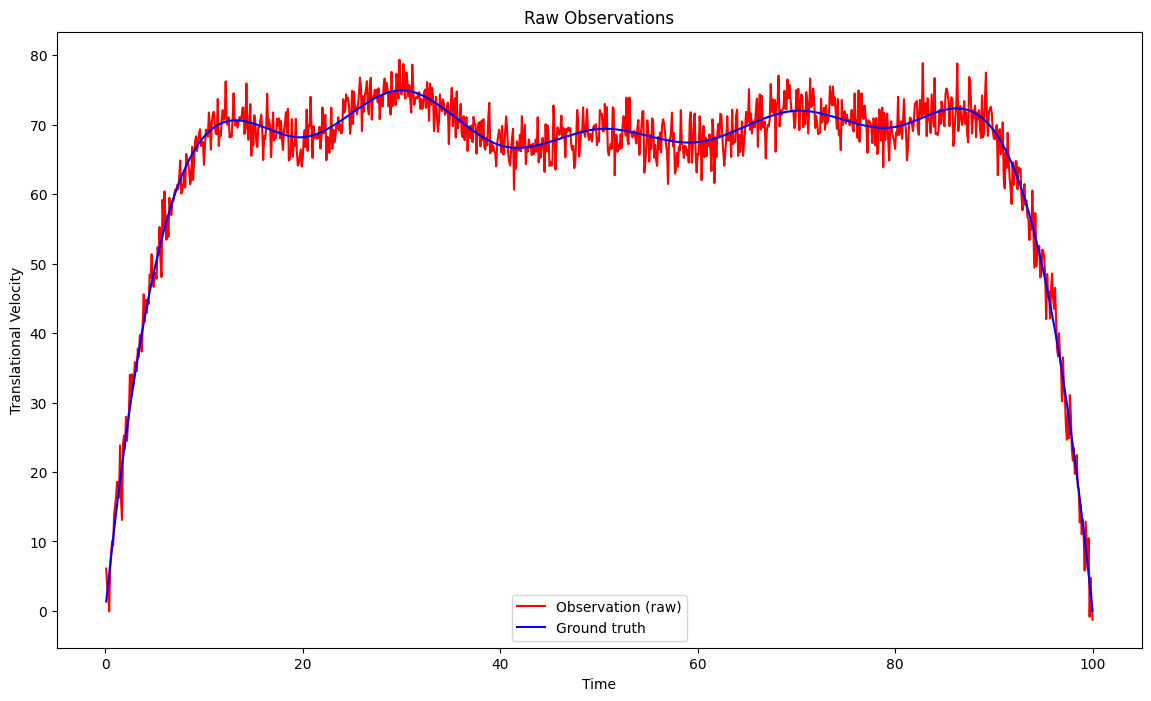

In [9]:
z = data['z']
plt.figure(figsize=(14,8))

# Plot observations. Time index of z[0] corresponds to x[1]
plt.plot(t[1:], z, label="Observation (raw)", color="r")
plt.plot(t[1:], x_real[1:], label="Ground truth", color="b")

plt.title('Raw Observations')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Translational Velocity')
plt.show()

## KF integration
Implement the Kalman filter for a recursive state estimation of $x_t$ corresponding to the car's velocity. Plot the output of the algorithm $bel(x_t)$ as well as its $\pm$1,3-sigma.

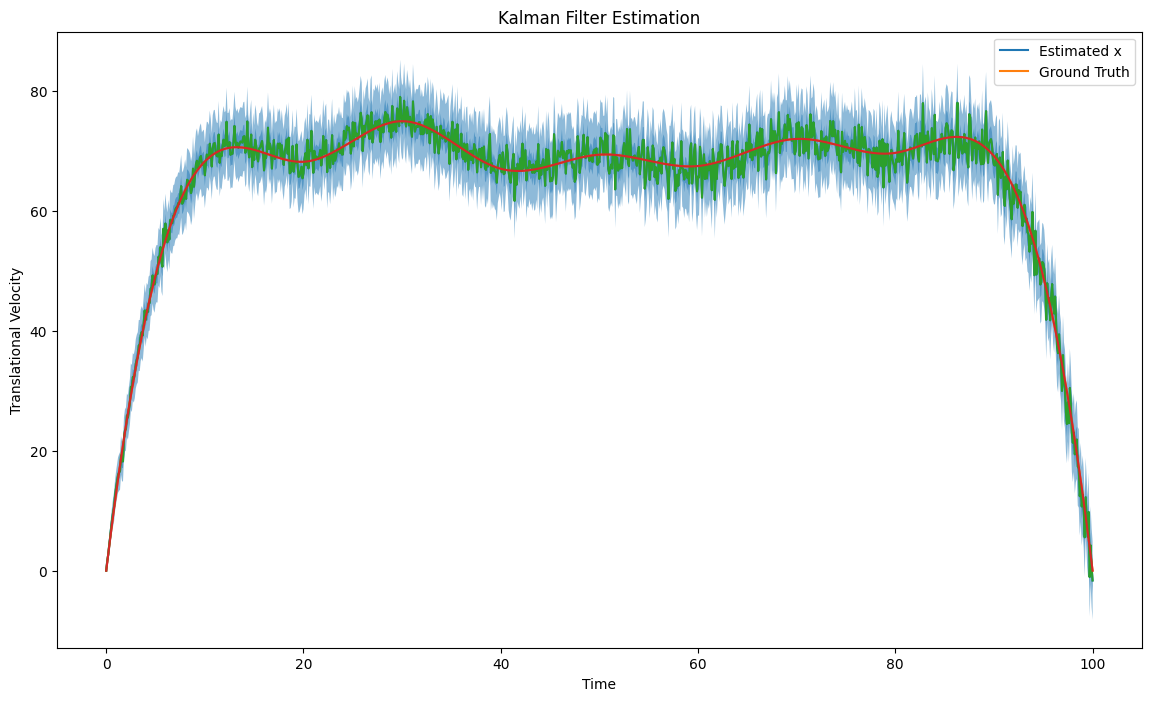

In [13]:
x = np.zeros(N)
P = np.zeros(N)
x_pred = np.zeros(N)
P_pred = np.zeros(N)
Q = 5


# Implement the KF operations for 1d
for i in range(1,N):
    x_pred[i] = x_pred[i-1] + dt * u[i-1]
    P_pred[i] = P_pred[i-1] + dt ** 2 * M
    Kt = P_pred[i] / (P_pred[i] + Q)
    x[i] = x_pred[i] + Kt * (z[i - 1] - x_pred[i])
    P[i] = (1 - Kt) * P_pred[i]

sigma = np.sqrt(P)

handles = list()
minus_sigma = x - sigma
plus_sigma = x + sigma
plt.figure(figsize=(14,8))
handles.extend(ciplot(t, x, minus_sigma, plus_sigma, x_real))

three_sigma = 3 * sigma
minus_sigma = x - three_sigma
plus_sigma = x + three_sigma
handles.extend(ciplot(t, x, minus_sigma, plus_sigma, x_real))

plt.title('Kalman Filter Estimation')
plt.legend(handles, ['Estimated x', 'Ground Truth'])
plt.xlabel('Time')
plt.ylabel('Translational Velocity')
plt.show()

In [19]:
(z - x_real[1:]).std()

2.3482959185016905

In [22]:
sigma.mean()

2.043934569030881